# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - X - \varepsilon)^2 = \mathbb{E}[((a-1)^2X^2 - 2(a-1)X\varepsilon + \varepsilon^2)] =$ 

$ = (a-1)^2\mathbb{E}X^2 - 2(a-1)\mathbb{E}X\mathbb{E}\varepsilon + \mathbb{E}\varepsilon^2 = (a-1)^2\mathbb{E}X^2 + \mathbb{E}\varepsilon^2 = (a-1)^2 + \sigma^2$,

So, in our task $a^* = 1$.

The population risk minimizer stays the same for all values of $\sigma^2$. 

In our task we know $a^* = 1$.

In [45]:
population_val = lambda a, sigma: (a-1)**2 + sigma**2

### b)

In [46]:
import numpy as np
rng = np.random.default_rng()

In [47]:
n = 50
epsilon = 1
X = rng.normal(0, 1, size=n)
Y = X+rng.normal(0, epsilon, size=n)
def empirical_risk(a, x, y):
    return np.mean((a*x-y)**2)

In [48]:
empirical_risk(0, X, Y)

1.8712385002555647

In [49]:
empirical_risk(1, X, Y)

1.358780972959051

In [50]:
empirical_risk(2, X, Y)

2.5374523337368453

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

### c)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X.reshape(-1,1),Y)
a_hat = lr.coef_[0]

In [52]:
a_hat

0.8030268898546524

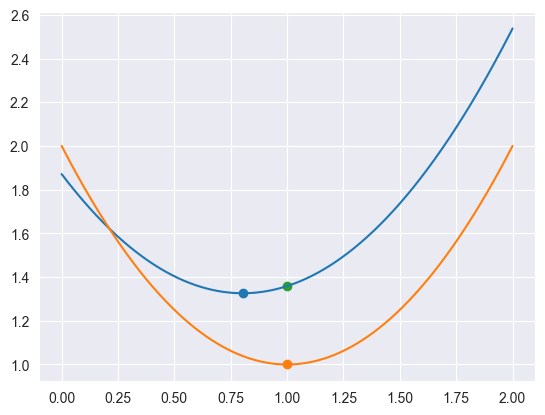

In [53]:
import matplotlib.pyplot as plt
plot_X = np.linspace(0,2, 1000)
plot_Y_empirical = np.array([empirical_risk(a, X, Y) for a in plot_X])
sigma = 1
plot_Y_theoretical = np.array([population_val(a, sigma) for a in plot_X])
plt.plot(plot_X, plot_Y_empirical)
plt.plot(plot_X, plot_Y_theoretical)
plt.scatter(a_hat, np.min(plot_Y_empirical))
plt.scatter(plot_X[np.argmin(plot_Y_theoretical)], np.min(plot_Y_theoretical))
plt.scatter(plot_X[np.argmin(plot_Y_theoretical)], plot_Y_empirical[np.argmin(plot_Y_theoretical)])
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [54]:
# excess risk
population_val(a_hat, sigma)-1

0.03879840612033125

In [55]:
population_val(a_hat, sigma)-population_val(1, sigma)

0.03879840612033125

In [56]:
# simulations with fixed sample size
L = 200
n = 50
epsilon = 1
excess_risk_fixed = []
for i in range(L):
    X_temp = rng.normal(0, 1, size=n)
    Y_temp = X_temp+rng.normal(0, epsilon, size=n)
    lr_t = LinearRegression(fit_intercept=False).fit(X_temp.reshape(-1,1),Y_temp)
    a_hat_t = lr_t.coef_[0]
    excess_risk_fixed.append(population_val(a_hat_t, sigma)-1)
np.mean(excess_risk_fixed)

0.019855412276247764

In [57]:
# simulations for various sample sizes
excess_risk_by_sample = []
sample_sizes = [25, 50, 75, 100, 200, 500, 750, 1000]
for sample in sample_sizes:
    excess_risk_curr = []
    for i in range(L):
        X_temp = rng.normal(0, 1, size=sample)
        Y_temp = X_temp+rng.normal(0, epsilon, size=sample)
        lr_t = LinearRegression(fit_intercept=False).fit(X_temp.reshape(-1,1),Y_temp)
        a_hat_t = lr_t.coef_[0]
        excess_risk_curr.append(population_val(a_hat_t, sigma)-1)
    excess_risk_by_sample.append(np.mean(excess_risk_curr))

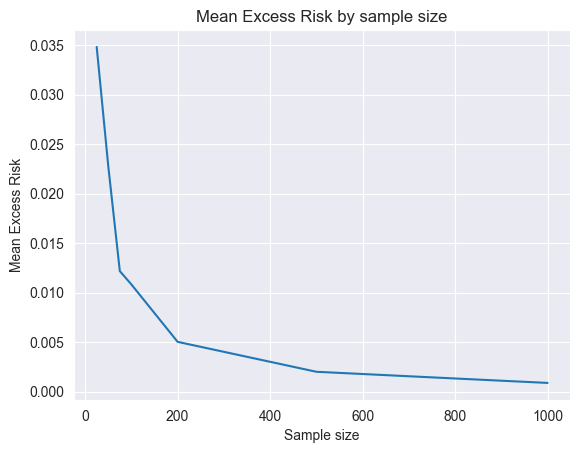

In [58]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(sample_sizes, excess_risk_by_sample)
plt.title("Mean Excess Risk by sample size")
plt.xlabel("Sample size")
plt.ylabel("Mean Excess Risk")
plt.show()